Ερώτημα 1.1

0.9651409469319534
817888


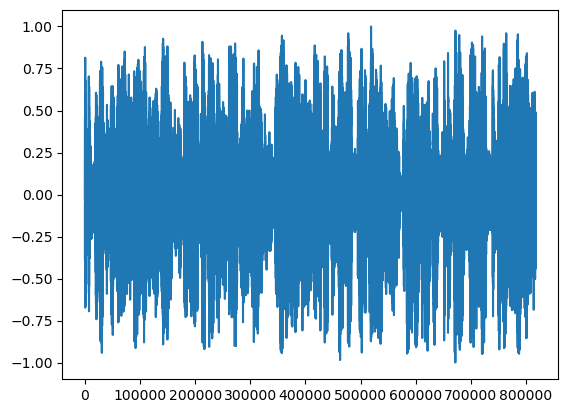

818176


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import IPython
import scipy as sp
import scipy.signal
from scipy.io import wavfile
import math

#stereo to mono
fmsample , musicstereo=wavfile.read('music.wav')
music_mono = musicstereo.mean(axis=1, dtype=musicstereo.dtype)


#normalize
megisto=max(music_mono)
print(megisto)
sig=music_mono/megisto
print(len(sig))

plt.plot(np.arange(len(sig)),sig)
plt.show()

zero=np.zeros(288)
sig=np.concatenate((sig, zero), axis=None)# κολλαω 0 στο τελος του σηματος για ευκολια στο λουπ με το 512

W_Han = np.hanning(512)

y=[]
for i in range (0,len(sig),512):
    y[i:i+512]=W_Han * sig[i:i+512]
    
print(len(y))


1598
10938.8671875


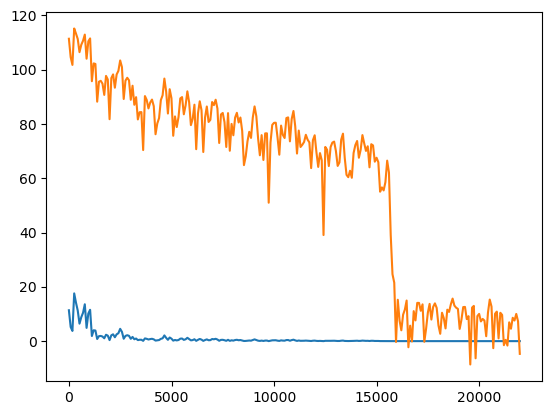

In [2]:
DFTy=[]
fkf=[]
j=0
for i in range (0,len(y),512):
    temp = np.abs(np.fft.fft(y[i:i+512],512))
    DFTy.append(temp)
    fkf.append(temp[0:256])

fkftest = np.array(fkf)#apo list se array
print(len(fkftest))

pk=90.302+10*np.log10(np.square(fkf))
#print(len(pk[0]))


freq= np.arange(256)*44100/512
plt.plot(freq,fkf[0])
plt.plot(freq,pk[0])
print(freq[127])

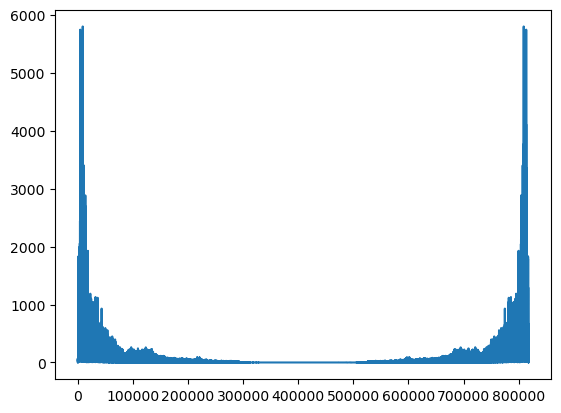

In [3]:
DFT = np.abs(np.fft.fft(sig,len(sig)))
plt.plot(DFT)
plt.show()

In [4]:
N=len(y)
T=1/44100
t = np.linspace(0.0, N*T, N, endpoint=False)
frequency= np.fft.fftfreq(t.size, d=T)   
#plt.plot(frequency[0:N//2],np.abs(pk[0:N//2]))

409088
19.825872435541495


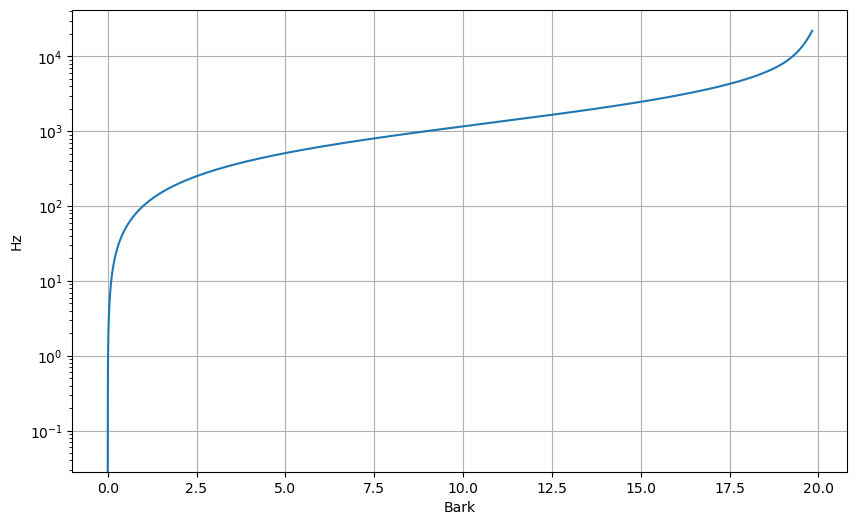

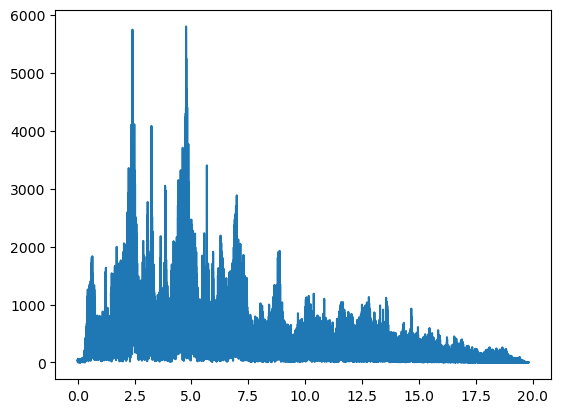

In [5]:
bark=13*np.arctan(0.00076*np.real(frequency[0:N//2])+3.5*np.arctan((np.real(frequency[0:N//2])/7500.0)**2))

plt.figure(figsize=(10,6))
plt.plot(bark,frequency[0:N//2])
plt.yscale('log',base=10)
plt.ylabel('Hz')
plt.xlabel('Bark')
plt.grid()
print(len(bark))
print(max(bark))

plt.figure(2)
plt.plot(bark,DFT[0:len(DFT)//2])
plt.show()

Ερώτημα 1.2

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


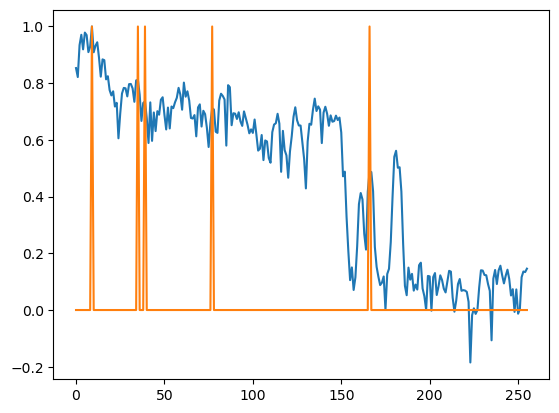

In [6]:
sk = []
def sk_check (pk,i,num_neigh):
    cond = 0;
    if pk[i]>pk[i+1] and pk[i]>pk[i-1]:
        cond=0
        for k in range(2,num_neigh+1,1):
            if pk[i]>pk[i+k]+7 and pk[i]>pk[i-k]+7 :
                cond=1
            else:
                cond=0
                return cond
    return cond

def  masks (pk):
    sk=[]
    for j in range(len(pk)):
        temp = np.zeros(len(pk[0]))
        for i in range(2,len(pk[0])-7):
            if i<63:
                temp[i]=sk_check(pk[j],i,2)
            elif i<127:
                temp[i]=sk_check(pk[j],i,3)
            else:
                temp[i]=sk_check(pk[j],i,6)

        sk.append(temp)
    return(sk)
sk=masks(pk)
test = 30
print(sk[test])
plt.plot(pk[test]/max(pk[test]))
plt.plot(sk[test])

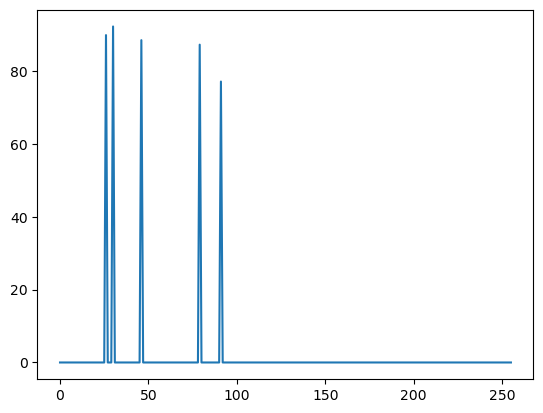

In [7]:

def energy (pk,sk):
    energy = []
    for i in range(len(pk)):
        temp1=np.zeros(len(pk[0]))
        for j in range(1,len(pk[0])):
                if sk[i][j]:
                       temp1[j] = 10*np.log10(pow(10,0.1*pk[i][j-1])+pow(10,0.1*pk[i][j])+pow(10,0.1*pk[i][j+1]))
                else:
                       temp1[j] =0
        energy.append(temp1)
    return(energy)
    
tone_energies_mask = energy(pk,sk)
plt.plot(tone_energies_mask[10])  
plt.show()

256
(1598, 256)


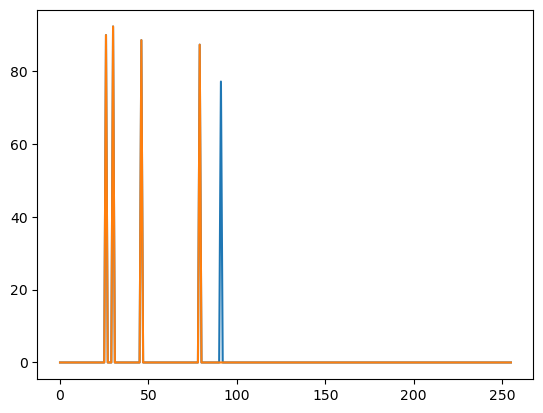

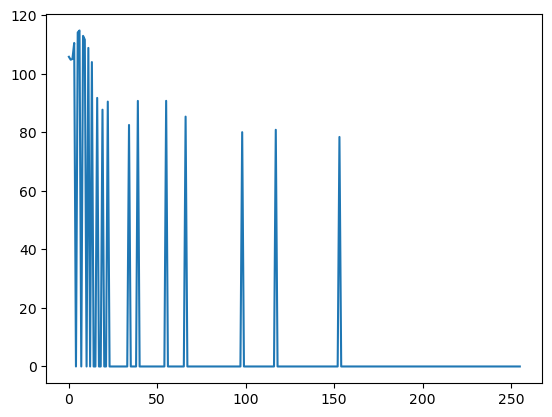

In [8]:
#και οι 3 πινκαες εχουν διαστασεις 1598*256, 1598 cases με 256 στοιχεία
matrix=np.load('P_NM-23.npy') #matrix ειναι για μασκες θορυβου κανονικες
matrix=np.transpose(matrix)


tones=np.load('P_TMc-23.npy')
tones_masks=np.transpose(tones)# τονικες μασκες

noise=np.load('P_NMc-23.npy')
noise_masks=np.transpose(noise)# μασκες θορυβου μειωμένες

case=10
plt.figure(1)
plt.plot(tone_energies_mask[case])
plt.plot(tones_masks[case])
#plt.plot(pk[case])

print(len(tones_masks[0]))
print(noise_masks.shape)

plt.figure(2)
#plt.plot(matrix[case])#blue
plt.plot(noise_masks[case])#orange

plt.show()

Ερώτημα 1.4

In [9]:
b=[]
def b(i):
        f=i*44100/512
        bark=13*np.arctan(0.00076*f)+3.5*np.arctan((f/7500.0)**2)
        return(bark)

def df(i,j):
        df=b(i)-b(j)
        return (df)

def TM(Ptm,i,j):
    return (Ptm[j]-0.275*b(j)+SF(Ptm,i,j)-6.025)
def TN(Pnm,i,j):
    return (Pnm[j]-0.175*b(j)+SF(Pnm,i,j)-2.025)
    
def SF(arr,i,j):
    SF_val = 0
    if df(i,j)>= -3 and df(i,j)<-1:
        SF_val = 17*df(i,j)-0.4*arr[j]+11
    elif df(i,j)>= -1 and df(i,j)<0:
        SF_val = (0.4*arr[j]+6)*df(i,j)
    elif df(i,j)>=0 and df(i,j)<1:
        SF_val = -17*df(i,j)
    elif df(i,j)>=1 and df(i,j)<8:
        SF_val = (0.15*arr[j]-17)*df(i,j)-0.15*arr[j]
    return SF_val
                    

In [16]:
indexes_t = []
indexes_n = []
for i in range (len(tone_energies_mask)):
    temp =[index for index, value in enumerate(tones_masks[i]) if value > 0]
    indexes_t.append(temp)
    temp1 =[index for index, value in enumerate(noise_masks[i]) if value > 0]
    indexes_n.append(temp1)

print(len(indexes_n[3]))    

22


In [17]:
TT_=[]
for k in range(len(tone_energies_mask)):#k 0-1598
    temp_2_tone =[]
    for i in range(len(tone_energies_mask[0])):#i 0-256
        temp_tone = np.zeros(len(tone_energies_mask[0]))
        for j in indexes_t[k]:
            temp_tone[j] = TM(tones_masks[k],i,j)
        temp_2_tone.append(temp_tone)
    TT_.append(temp_2_tone)

Ερώτημα 1.5

In [ ]:
freqs = np.linspace(10**(1.7), 10**(4.25), 5000)
T_q = [
    3.64 * math.pow(f / 1000, -0.8) - 6.5 * np.exp(-0.6 * math.pow(f / 1000 - 3.3, 2)) + 1 / 1000 * math.pow(f / 1000, 4) 
    for f in freqs
]
plt.plot(T_q)
plt.xscale("log")
plt.show()

In [ ]:
def sum_pow(k,l,arr,mask):
    sum = 0
for i in range(len(arr)):
    if mask[i] !=0:
        sum +=10**(0.1*arr[i])
return sum

def T_g(Tt,Tn):
    T_g_list = []
for i in range(len(Tt)):
    temp = []
for j in range(1,255):
    temp.append(10*np.log10(10**(0.1*Tq(j))+sum_pow(i,j,Tt[i][j],tones_masks[i])+sum_pow(i,j,Tn[i][j],noise_masks[i])))
    T_g_list.append(temp)
    return T_g_list

Tg = T_g(TM_,TN_)


In [ ]:
x = np.linspace(170,17000,255)
plt.xscale("log")
plt.plot(Tg[10])
plt.show()